# **Regressione OLS (Ordinary Least Squares) - Metodo dei Minimi Quadrati**


## **1. Modello Matematico della Regressione Lineare**
La regressione lineare assume che la relazione tra la variabile dipendente $y$ e la variabile indipendente $x$ sia:

$$
y=β0+β1x+ϵ
$$

Dove:
- $β0$ è l'intercetta,
- $β1$ è il coefficiente di regressione,
- $ϵ$ il termine di errore.

Se abbiamo più variabili indipendenti:

$$
y = β0+β1x1 + β0+β2x2 + \dots + βnxn + ϵ
$$



## **2. Stima dei Coefficienti con il Metodo OLS**
Il metodo OLS minimizza la somma dei quadrati degli errori:

$$
J(β) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

dove la formula della regressione OLS è $ \hat{y} = X\beta $.

La formula per i coefficienti ottimali è:

$$
\hat{β} = (X^T X)^{-1} X^T y
$$


## **3. Implementazione in Python**

In [1]:
%pip install numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### **3.1 Calcolo manuale con numpy**

Intercetta (beta_0): 4.21509615754675
Pendenza (beta_1): 2.7701133864384806


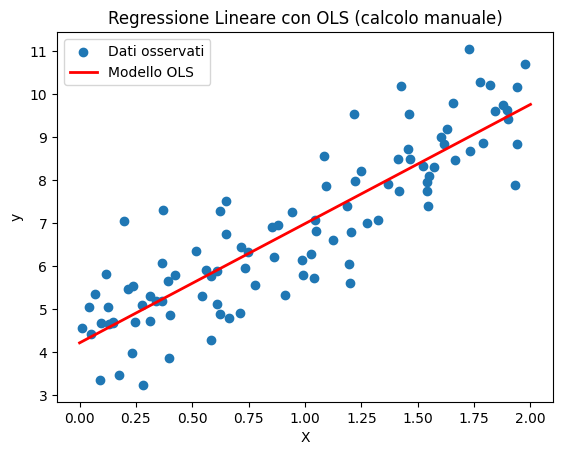

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Generiamo dati sintetici
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Aggiungiamo la colonna di 1 per l'intercetta
X_b = np.c_[np.ones((100, 1)), X]

# Calcoliamo i coefficienti OLS
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Stampiamo i coefficienti
print(f"Intercetta (beta_0): {theta_best[0][0]}")
print(f"Pendenza (beta_1): {theta_best[1][0]}")

# Predizioni
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

# Grafico
plt.scatter(X, y, label="Dati osservati")
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Modello OLS")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Regressione Lineare con OLS (calcolo manuale)")
plt.show()


### **3.2 Soluzione con Scikit-Learn**

Intercetta (beta_0): 4.215096157546747
Pendenza (beta_1): 2.7701133864384837


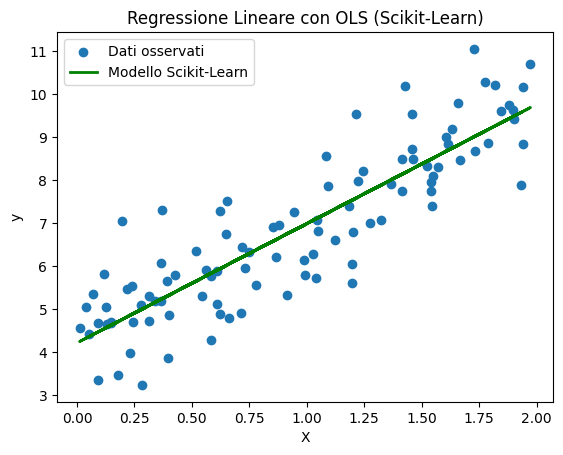

In [4]:

from sklearn.linear_model import LinearRegression

# Creiamo il modello di regressione lineare
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Stampiamo i coefficienti
print(f"Intercetta (beta_0): {lin_reg.intercept_[0]}")
print(f"Pendenza (beta_1): {lin_reg.coef_[0][0]}")

# Predizioni con il modello
y_sklearn_predict = lin_reg.predict(X)

# Grafico
plt.scatter(X, y, label="Dati osservati")
plt.plot(X, y_sklearn_predict, "g-", linewidth=2, label="Modello Scikit-Learn")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Regressione Lineare con OLS (Scikit-Learn)")
plt.show()


## **4. Valutazione del Modello**

In [5]:

# Calcoliamo R^2 con Scikit-Learn
r2_score = lin_reg.score(X, y)
print(f"R-quadro: {r2_score}")


R-quadro: 0.7692735413614223


## **5. Residui e Analisi Grafica**

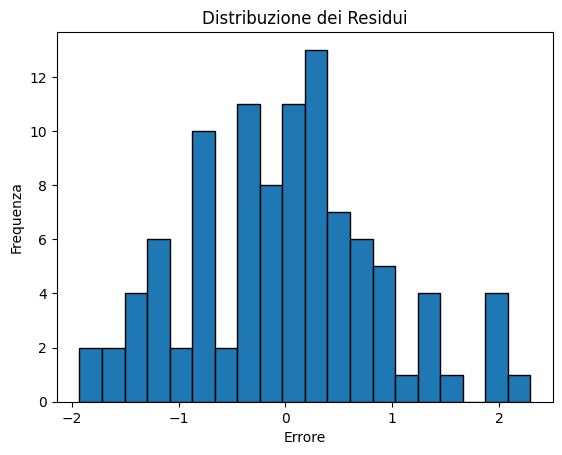

In [6]:

# Istogramma dei Residui
residuals = y - y_sklearn_predict

plt.hist(residuals, bins=20, edgecolor="black")
plt.xlabel("Errore")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei Residui")
plt.show()


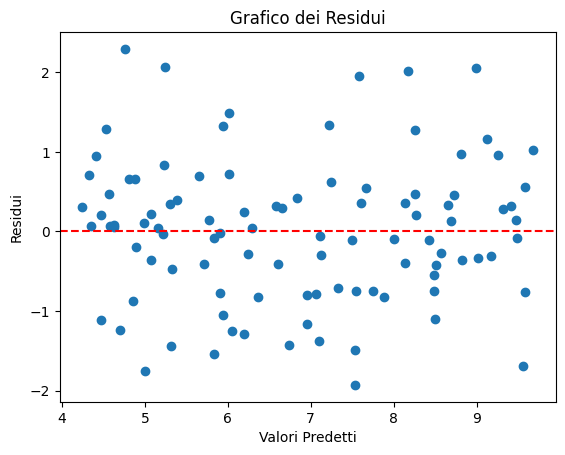

In [7]:

# Residui vs. Predizioni
plt.scatter(y_sklearn_predict, residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valori Predetti")
plt.ylabel("Residui")
plt.title("Grafico dei Residui")
plt.show()



## **6. Conclusioni**
Abbiamo visto che la **Regressione OLS** è una tecnica potente per modellare relazioni lineari tra variabili. Tuttavia, è importante verificare:
- **L'R-quadro** per misurare la bontà del modello.
- **I residui** per individuare eventuali pattern sistematici.

Questa tecnica è ampiamente usata in finanza, economia e scienze sociali per fare previsioni e interpretare relazioni tra variabili.
